# Cafe Sales Data Analysis 📊
In this project, we analyze a sample sales dataset using Python libraries such as Pandas, NumPy, and Matplotlib/Seaborn.

**Objectives**:

- Explore dataset structure
- Perform cleaning and preprocessing
- Generate insights from data
- Visualize important trends

---

In [1]:
#library importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### **1. Load Dataset**
We use Pandas to read the dataset and display the first 5 rows to understand its structure.



In [2]:
#loading the dataset
file = pd.read_csv("dirty_cafe_sales1.csv") 
file.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,08-09-2023
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,16-05-2023
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,19-07-2023
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,27-04-2023
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,11-06-2023
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,31-03-2023
6,TXN_4433211,NaN,3.0,3.0,9.0,NaN,Takeaway,06-10-2023
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,28-10-2023
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,28-07-2023
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,31-12-2023


### **2. Explore the dataset**

We check dataset dimensions, columns, data types, and summary statistics.



In [3]:
print("Shape of dataset:", file.shape)
print("\nColumn names:", file.columns.tolist())
print("\nDataset Information:")
print(file.describe())
file.info()

Shape of dataset: (10000, 8)

Column names: ['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date']

Dataset Information:
          Quantity  Price Per Unit  Total Spent
count  9521.000000     9467.000000  9498.000000
mean      3.028463        2.949984     8.924352
std       1.419007        1.278450     6.009919
min       1.000000        1.000000     1.000000
25%       2.000000        2.000000     4.000000
50%       3.000000        3.000000     8.000000
75%       4.000000        4.000000    12.000000
max       5.000000        5.000000    25.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9031 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null  

### **3. Data Cleaning**
We check for garbage values, missing values and duplicates, and clean the data accordingly.


#### 3.1 Null Values Handling
Here we can see that some values are null(empty). Checking it and changing it accordingly

In [4]:
# Checking for missing values
print("Total Null:        ",file.isnull().sum().sum())
print(file.isnull().sum())

Total Null:         10082
Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64


In [5]:
print(file['Item'].mode()[0])
print(file['Quantity'].mode()[0])
print(file['Price Per Unit'].mode()[0])
print(file['Total Spent'].mode()[0])
print(file['Payment Method'].mode()[0])
print(file['Location'].mode()[0])

Juice
5.0
3.0
6.0
Digital Wallet
Takeaway


In [6]:
#filling na values using mode
file.loc[:,'Item'] = file['Item'].fillna(file['Item'].mode()[0])
file.loc[:,'Payment Method'] = file['Payment Method'].fillna(file['Payment Method'].mode()[0])
file.loc[:,'Location'] = file['Location'].fillna(file['Location'].mode()[0])

In [7]:
#filling na values using mean
file.loc[:, 'Quantity'] = file['Quantity'].fillna(file['Quantity'].mean()).round(1)
file.loc[:, 'Price Per Unit'] = file['Price Per Unit'].fillna(file['Price Per Unit'].mean()).round(1)
file.loc[:, 'Total Spent'] = file['Total Spent'].fillna(file['Total Spent'].mean()).round(1)

In [8]:
#removing remaining null values
file = file.dropna()

In [9]:
#checking for null values
print("Remaining null values count: ",file.isnull().sum())

Remaining null values count:  Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


#### 3.2 Duplicate Values Handling


In [10]:
# Checking for duplicates
print("Duplicate rows:", file.duplicated().sum())
# Drop duplicates if any
file = file.drop_duplicates()

Duplicate rows: 0


In [11]:
print("Duplicate rows:", file.duplicated('Transaction ID').sum())

Duplicate rows: 0


### **4. Feature Engineering**
We already have TotalPrice = Quantity × UnitPrice in dataset.
Let's extract Year, Month, and Day from the InvoiceDate for trend analysis.

In [12]:
file.info() #checking the details of the data type

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9540 non-null   object 
 1   Item              9540 non-null   object 
 2   Quantity          9540 non-null   float64
 3   Price Per Unit    9540 non-null   float64
 4   Total Spent       9540 non-null   float64
 5   Payment Method    9540 non-null   object 
 6   Location          9540 non-null   object 
 7   Transaction Date  9540 non-null   object 
dtypes: float64(3), object(5)
memory usage: 670.8+ KB


#### 4.1 Data Verification
- From the above data set, first we have to convert the the data type accordingly
- And then we can see nulls so clear it and make it clean

In [13]:
file['Quantity'] = pd.to_numeric(file['Quantity'], errors='coerce').astype('Int64') 
file['Price Per Unit'] = pd.to_numeric(file['Price Per Unit'], errors='coerce') 
file['Total Spent'] = pd.to_numeric(file['Total Spent'], errors='coerce') 
file['Transaction Date'] = pd.to_datetime(file['Transaction Date'], errors='coerce',dayfirst=True) 
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   Int64         
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   float64       
 5   Payment Method    9540 non-null   object        
 6   Location          9540 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(2), object(4)
memory usage: 680.1+ KB


#### 4.2 Creating New Columns
- From the 'Transaction Date' column, extracting the 'Year', 'Month', 'Date'

In [14]:
file["Year"] = file['Transaction Date'].dt.year
file["Month"] = file['Transaction Date'].dt.month
file["Day Of Week"] = file['Transaction Date'].dt.day_name()
file['Total Spent'] = file['Quantity'] * file['Price Per Unit'] 
file

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Year,Month,Day Of Week
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023,9,Friday
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,2023,5,Tuesday
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,2023,7,Wednesday
3,TXN_7034554,Salad,2,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,2023,4,Thursday
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,Digital Wallet,Takeaway,2023-08-30,2023,8,Wednesday
9996,TXN_9659401,Juice,3,2.9,8.7,Digital Wallet,Takeaway,2023-06-02,2023,6,Friday
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,Takeaway,2023-03-02,2023,3,Thursday
9998,TXN_7695629,Cookie,3,2.9,8.7,Digital Wallet,Takeaway,2023-12-02,2023,12,Saturday


### **5. Data Analysis**
Analysing the cleaned data and finding insights with questions

- The above data set shows the sales details of a cafe
  - Descriptive 
    1. Which item has the max sale?
    2. Which payment method is used mostly?
    3. What is the total sales quantity of item?
    4. Which location is mostly used?
    5. Which month has highest sales amount and highest sales count?
    6. Which payment method is mostly used for each Item?
    7. Which days of the week have the highest sales?

### Answering the questions

In [15]:
#1. Which item has the max sale?
max_sales = file.groupby(['Item'])['Total Spent'].sum() # Amount wise
print(max_sales.sort_values(ascending=False))

Item
Juice       18213.7
Salad       16179.4
Sandwich    12874.8
Smoothie    12624.1
Cake         9819.1
Coffee       6984.1
Tea          4964.7
Cookie       3429.3
Name: Total Spent, dtype: Float64


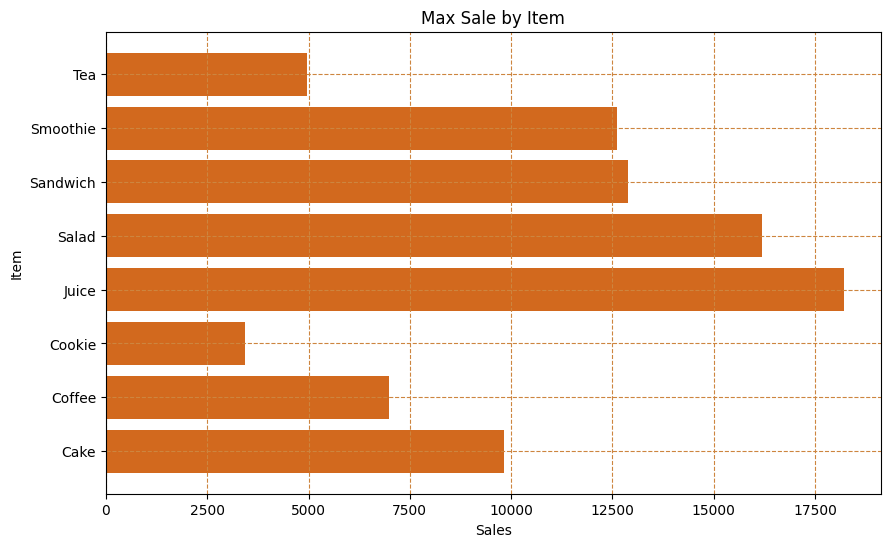

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(max_sales.index,max_sales.values,color='chocolate')
plt.title("Max Sale by Item") 
plt.xlabel("Sales")
plt.ylabel("Item")
plt.grid(color='peru', linestyle='--')
plt.show()

- The 'Juice' is maximum sold item with Sales Amount of 18213.7
- The 'Cookie' is minimum sold item with Sales Amount of 3429.3
- The sales range of other items are around between 5000 to 12,500

In [17]:
#2. Which payment method is used mostly?
most_payment_method_count = file.groupby(['Payment Method'])['Transaction ID'].count().sort_values(ascending=False)
print(most_payment_method_count)

Payment Method
Digital Wallet    5212
Credit Card       2170
Cash              2158
Name: Transaction ID, dtype: int64


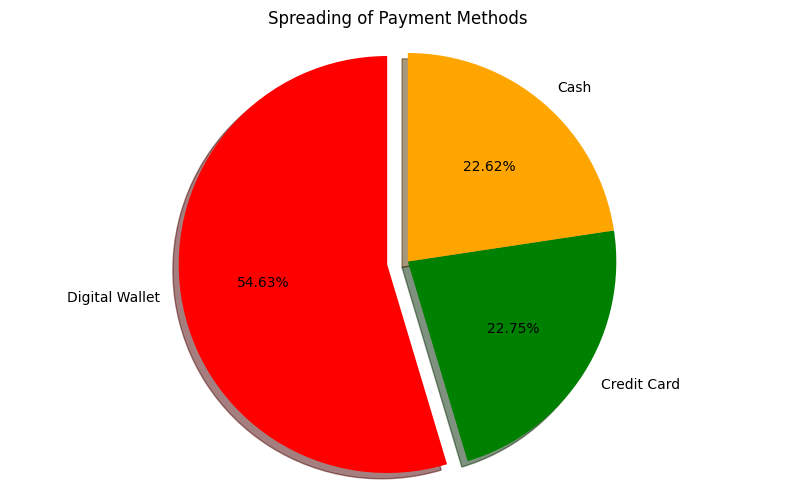

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(most_payment_method_count.values,
        labels=most_payment_method_count.index,
        colors=['red','green','orange'],
        autopct='%1.2f%%',
        explode=(0.1,0,0), 
        shadow=True,
        startangle=90)
plt.title("Spreading of Payment Methods")
plt.axis('equal')
plt.show()

- 'Digital Wallet' is the most used payment method (54.6%)
- 'Credit card' and 'Cash' is used for 22.75% and 22.62% respectively
- More than 50% of the customers prefers the 'Digital Wallet' and remaining customers equally uses 'credit card' and 'cash'

In [19]:
#3. What is the total sales quantity of item?
sales_quantity = file.groupby(['Item'])['Quantity'].sum().sort_values()
print(sales_quantity)

Item
Cookie      3093
Tea         3125
Smoothie    3208
Sandwich    3266
Cake        3278
Salad       3314
Coffee      3425
Juice       6141
Name: Quantity, dtype: Int64


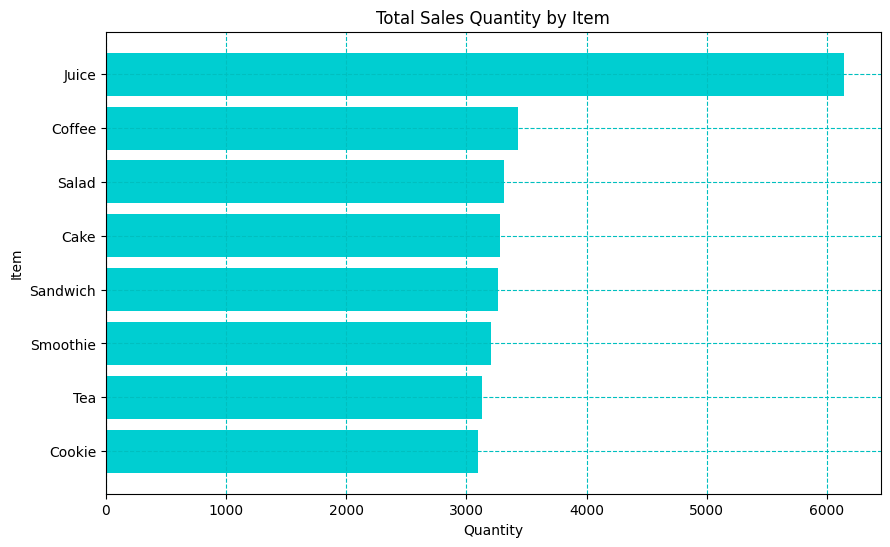

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(sales_quantity.index,sales_quantity.values,color='darkturquoise')
plt.title("Total Sales Quantity by Item") 
plt.xlabel("Quantity")
plt.ylabel("Item")
plt.grid(color='c', linestyle='--')
plt.show()

- The 'Juice' is most sold item with Sales Quantity of 6141.0
- The 'Cookie' is least sold item with Sales Amount of 3093.0
- 'Juice' is the only item which is sold more than 6000
- All other products are sold in the range around 3000 to 3500

In [21]:
#4. Which location is mostly used for each items?
most_location = file.groupby(['Location'])['Item'].count().sort_values(ascending=False)
print(most_location)

Location
Takeaway    6668
In-store    2872
Name: Item, dtype: int64


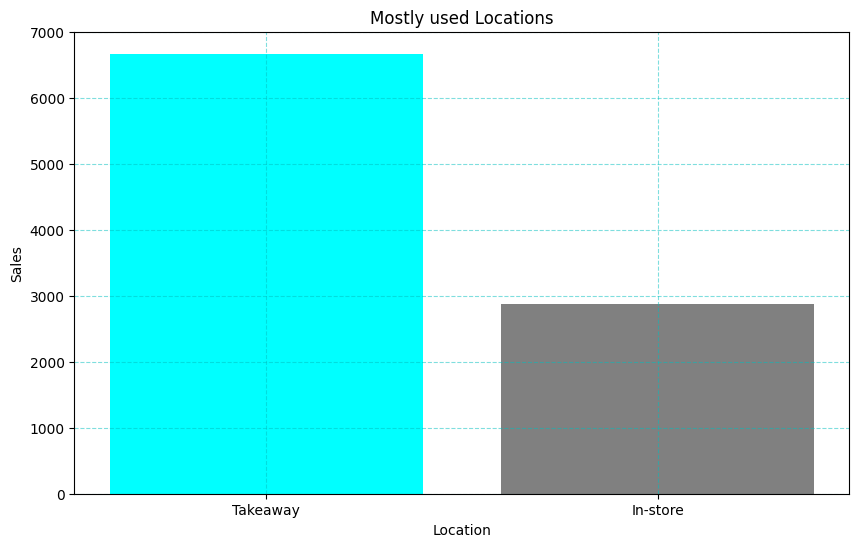

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(most_location.index,most_location.values,color=['cyan','gray'])
plt.title("Mostly used Locations")
plt.xlabel("Location")
plt.ylabel("Sales")
plt.grid(color='c', linestyle='--',alpha=.5)
plt.show()

- 'Take-away' is mostly prefered than 'In-Store' (6668)
- 'In-Store' is least prefered location (2872)
- Here we can see that 'Take-away' is prefered 2 times greater than 'In-Store'

In [23]:
#5. Which month has highest sales?
total_sales_amount = file.groupby(['Month'])['Total Spent'].sum()
print(total_sales_amount)

Month
1     7244.0
2     6661.4
3     7200.8
4     7184.4
5     6964.3
6     7404.8
7     6915.7
8     7089.2
9     6874.3
10    7337.1
11    7008.4
12    7204.8
Name: Total Spent, dtype: Float64


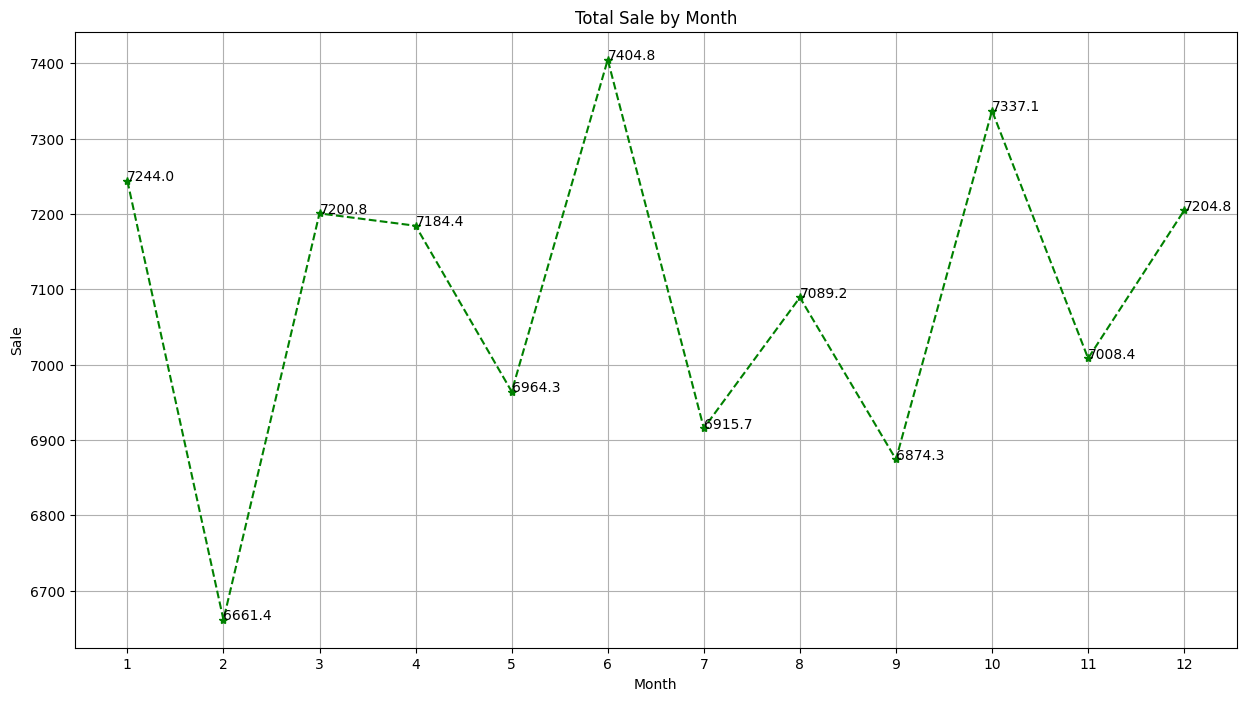

In [24]:
plt.figure(figsize=(15,8))
plt.plot(total_sales_amount.index,total_sales_amount.values,color='green', marker='*', linestyle='dashed')
plt.grid()
plt.title("Total Sale by Month") 
plt.xlabel("Month")
plt.xticks(list(x for x in range(1,13)))
plt.ylabel("Sale")
for x,y in zip(total_sales_amount.index,total_sales_amount.values):
    plt.annotate(y,xy=(x,y))
plt.show()

- October(7337.1) month is the highest sales month followed by June(7404.8)
- February(6661.4) is the least sold month compared to all other months

In [25]:
#6. Which payment method is mostly used for each Item?
df_pivot = file.pivot_table(index='Item', columns='Payment Method',aggfunc='size',fill_value=0)
df_pivot

Payment Method,Cash,Credit Card,Digital Wallet
Item,,,
Cake,264,240,578
Coffee,231,232,660
Cookie,234,239,562
Juice,460,485,1106
Salad,273,270,556
Sandwich,241,242,592
Smoothie,223,243,582
Tea,232,219,576


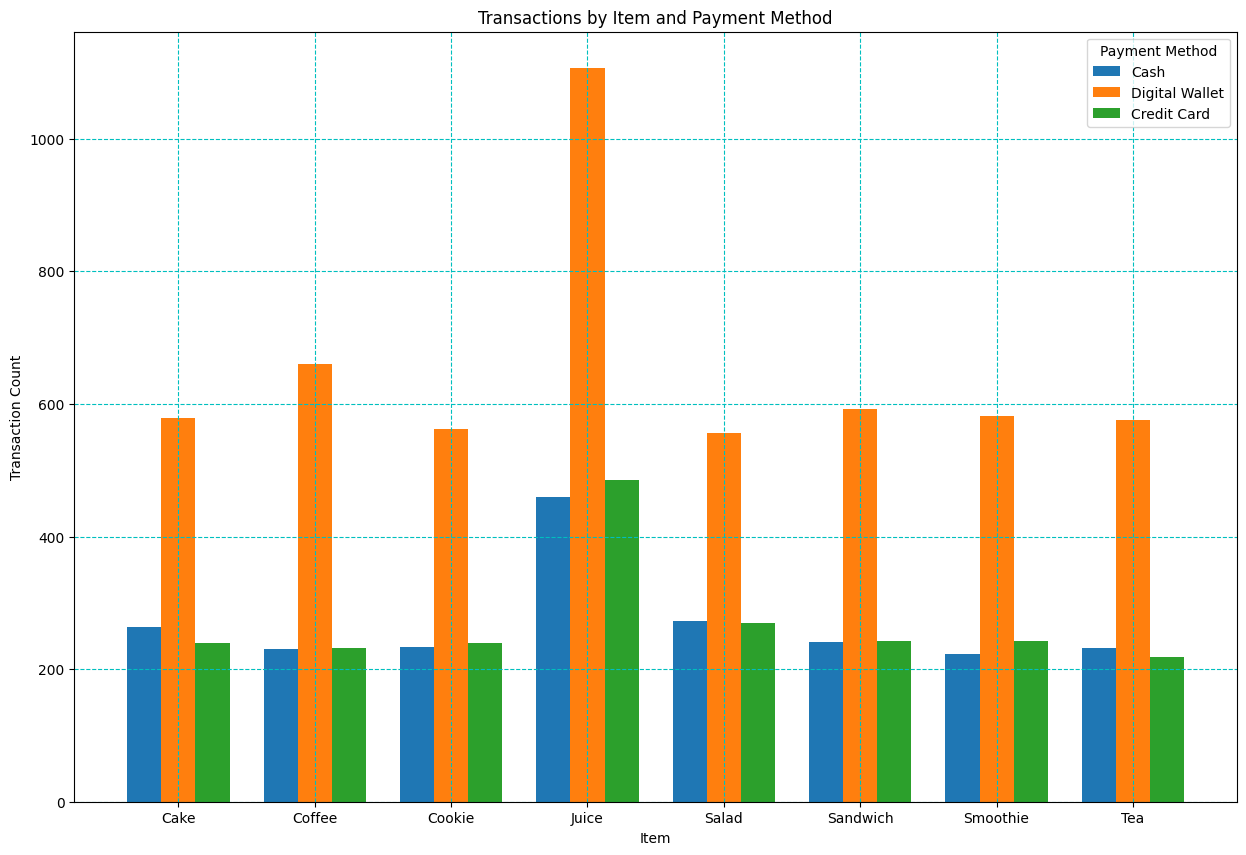

In [26]:
x = np.arange(len(df_pivot)) 
bar_width = 0.25

plt.figure(figsize=(15,10))
plt.bar(x - bar_width, df_pivot['Cash'], width=bar_width, label='Cash')
plt.bar(x , df_pivot['Digital Wallet'], width=bar_width, label='Digital Wallet')
plt.bar(x + bar_width, df_pivot['Credit Card'], width=bar_width, label='Credit Card')
plt.title('Transactions by Item and Payment Method')
plt.xticks(x, df_pivot.index)
plt.xlabel('Item')
plt.ylabel('Transaction Count')
plt.grid(color='c', linestyle='--')
plt.legend(title='Payment Method')
plt.show()

- Here we can see that the 'Digital Wallet' is the mostly used payment method for all items
- Other payment methods, 'Cash' and 'Credit card' is used in similar count and comparatively lower than 'Digital Wallet'

In [27]:
#7. Which days of the week have the highest sales?
weekly_sales = file.groupby('Day Of Week')['Total Spent'].sum().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
weekly_sales

Day Of Week
Sunday       12409.3
Monday       12182.3
Tuesday      12022.2
Wednesday    11762.2
Thursday     12371.3
Friday       12322.8
Saturday     12019.1
Name: Total Spent, dtype: Float64

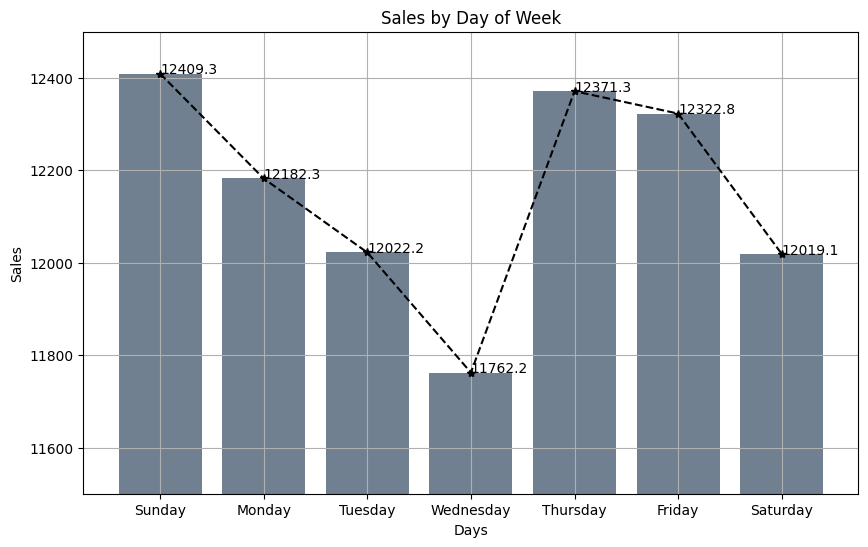

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(weekly_sales.index,weekly_sales.values,color='slategrey')
plt.plot(weekly_sales.index,weekly_sales.values,color='black', marker='*', linestyle='dashed')
for x,y in zip(weekly_sales.index,weekly_sales.values):
    plt.annotate(y,xy=(x,y))
plt.title("Sales by Day of Week")
plt.grid()
plt.xlabel("Days")
plt.ylabel("Sales")
plt.ylim(11500,12500)
plt.show()

- This chart shows that 'Sunday', 'Thursday' and 'Friday' holds the top 3 sales days respectively.
- 'Wednesday' is the least sales day in a Week.

In [29]:
avg_sales_month = file.groupby(['Month'])['Quantity'].count()
avg_sales_month

Month
1     818
2     727
3     827
4     774
5     777
6     818
7     791
8     803
9     788
10    838
11    784
12    795
Name: Quantity, dtype: Int64

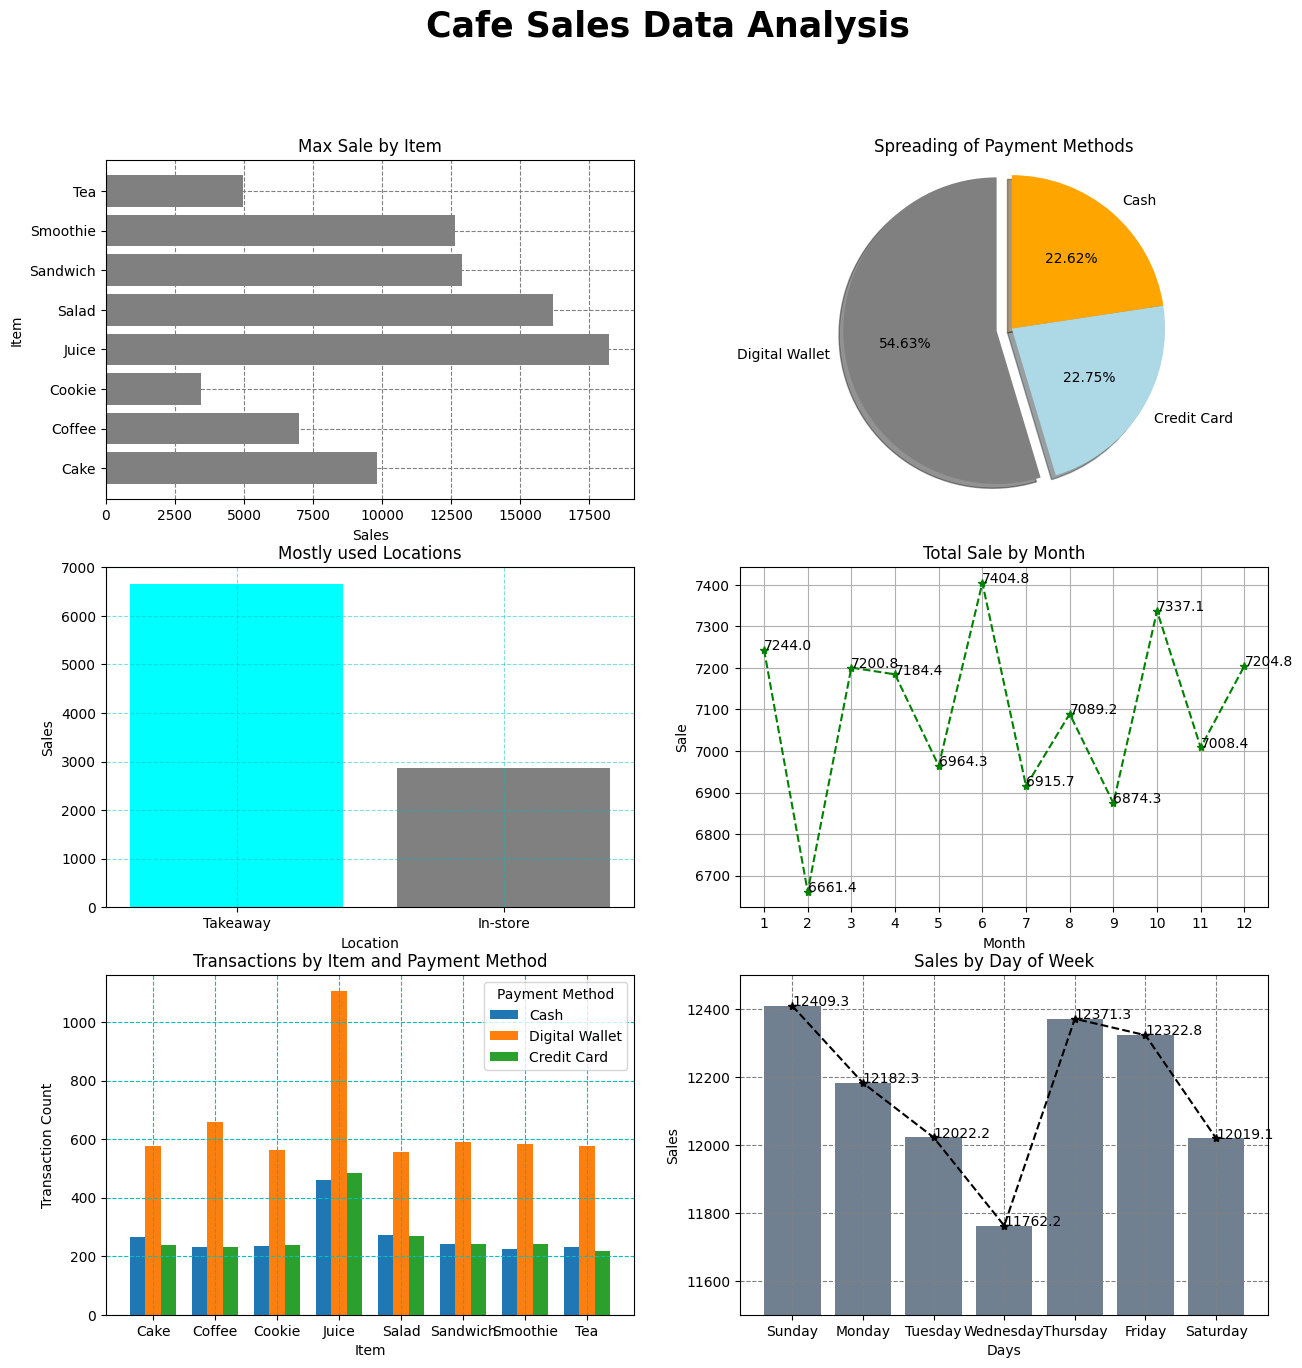

In [30]:
plt.figure(figsize=(15,15))
plt.suptitle('Cafe Sales Data Analysis', 
             fontsize=25, 
             fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 



plt.subplot(3,2,1)
plt.barh(max_sales.index,
         max_sales.values,
         color='gray')
plt.title("Max Sale by Item") 
plt.xlabel("Sales")
plt.ylabel("Item")
plt.grid(color='gray', linestyle='--')



plt.subplot(3,2,2)
plt.pie(most_payment_method_count.values,
        labels=most_payment_method_count.index,
        colors=['gray','lightblue','orange'],
        autopct='%1.2f%%',
        explode=(0.1,0,0), 
        shadow=True,
        startangle=90)
plt.title("Spreading of Payment Methods")
plt.axis('equal')



plt.subplot(3,2,3)
plt.bar(most_location.index,
        most_location.values,
        color=['cyan','gray'])
plt.title("Mostly used Locations")
plt.xlabel("Location")
plt.ylabel("Sales")
plt.grid(color='c', linestyle='--',alpha=.5)



plt.subplot(3,2,4)
plt.plot(total_sales_amount.index,
         total_sales_amount.values,
         color='green', marker='*', 
         linestyle='dashed')
plt.grid()
plt.title("Total Sale by Month") 
plt.xlabel("Month")
plt.xticks(list(x for x in range(1,13)))
plt.ylabel("Sale")
for x,y in zip(total_sales_amount.index,total_sales_amount.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))


    
plt.subplot(3,2,5)
x = np.arange(len(df_pivot)) 
bar_width = 0.25
plt.bar(x - bar_width, df_pivot['Cash'], width=bar_width, label='Cash')
plt.bar(x , df_pivot['Digital Wallet'], width=bar_width, label='Digital Wallet')
plt.bar(x + bar_width, df_pivot['Credit Card'], width=bar_width, label='Credit Card')
plt.title('Transactions by Item and Payment Method')
plt.xticks(x, df_pivot.index)
plt.xlabel('Item')
plt.ylabel('Transaction Count')
plt.grid(color='c', linestyle='--')
plt.legend(title='Payment Method')



plt.subplot(3,2,6)
plt.bar(weekly_sales.index,weekly_sales.values,color='slategrey')
plt.plot(weekly_sales.index,weekly_sales.values,color='black', marker='*', linestyle='dashed')
for x,y in zip(weekly_sales.index,weekly_sales.values):
    plt.annotate(y,xy=(x,y))
plt.title("Sales by Day of Week")
plt.grid(color='grey', linestyle='--')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.ylim(11500,12500)



plt.show()